# Lab 1: General Atmospheric Circulation


## Overview 

This lab explores general atmospheric circulation patterns using the ERA5 atmospheric reanalysis. ERA5 is produced by the Copernicus Climate Change Service at the European Centre for Medium-Range Weather Forecasts (ECMWF). The reanalysis combines model data with observations from around the world to provide hourly estimates of a large number of atmospheric, land, and oceanic climate variables. The data was accessed from the [ECMWF Climate Data Portal](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5).

The full reanalysis product covers the period from January 1940 to present. The original monthly datasets are available at 0.25$^\circ$ latitude x 0.25$^\circ$ longitude horizontal resolution. This yields 4.2 GB of data *per atmospheric variable*, so the files were regridded to a much coarser  ~4 $^\circ$ latitude x 4$^\circ$ longitude horizontal resolution (16.7 MB per file). The 4$^\circ$ resolution will still show the broad global patterns. If you would like to work with the higher-resolution files please ask Dr. Lawman and she will share them with you.

You will analyze global monthly and seasonal variations in 2-meter (near-surface) temperature, precipitation, and wind. You will then calculate anomalies and explore the spatial patterns of rising global temperatures.  All code and figures will be generated in this Jupyter Notebook using in Python. Please use comments (`#`) to organize your code and make it more readable.  **This lab is worth 60 points.**

**Required data:** (Download from GitHub)
- **2 m temperature:** ERA5_monthly_t2m_regrid.nc 
- **Total precipitation:** ERA5_monthly_tp_regrid.nc
- **10 m wind speed:** ERA5_monthly_si10_regrid.nc
- **10 m u-component of wind (zonal wind):** ERA5_monthly_u10_regrid.nc
- **10 m v-component of wind (meridional wind):** ERA5_monthly_v10_regrid.nc

**In this lab you will learn and practice the following skills:**

- Interpreting global atmospheric patterns
- Geospatial analysis 
- Statistical analysis
- Manipulating gridded data with Xarray
- Data visualization with Cartopy, Matplotlib, and cmocean

**To submit via Canvas:**

To foster a collaborative learning environment, you are encouraged to work in groups of 2-3, but each person must write and submit their own code, and individually answer all interpretation questions. All students must complete all problems - it is against the honor code to divide the problems up among different individuals. 

- Prior to submitting your lab assignments on Canvas, please name your Notebook files using the following syntax: *LastName_FirstName_EV333_Lab1.ipynb.*
- Type you responses to the short-answer questions in this Notebook. Add a cell and select 'Markdown' instead of 'Code' from the drop down menu. Add **Answer:** and provide your written responses.
- Re-run all cells to ensure that the Notebook runs completely through without errors and that all figures are displayed.
- Upload your final Jupyter Notebook (.ipynb file) to Canvas

---
## ERA5 Variable Descriptions
*Descriptions retrieved from the [Copernicus Climate Data Portal](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview).*

**2m temperature (K)**: This parameter is the temperature of air at 2m above the surface of land, sea or inland waters. 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. This parameter has units of kelvin (K). Temperature measured in elvin can be converted to degrees Celsius (°C) by subtracting 273.15.

**Total precipitation (m)**: This parameter is the accumulated liquid and frozen water, comprising rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation and convective precipitation. Large-scale precipitation is generated by the cloud scheme in the ECMWF Integrated Forecasting System (IFS). The cloud scheme represents the formation and dissipation of clouds and large-scale precipitation due to changes in atmospheric quantities (such as pressure, temperature and moisture) predicted directly by the IFS at spatial scales of the grid box or larger. Convective precipitation is generated by the convection scheme in the IFS, which represents convection at spatial scales smaller than the grid box. This parameter does not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This parameter is accumulated over a particular time period which depends on the data extracted. For the monthly averaged reanalysis, the accumulation period is 1 day.

**10m u-component of wind (m/s):** This parameter is the eastward component of the 10m wind. It is the horizontal speed of air moving towards the east, at a height of ten metres above the surface of the Earth, in metres per second. Care should be taken when comparing this parameter with observations, because wind observations vary on small space and time scales and are affected by the local terrain, vegetation and buildings that are represented only on average in the ECMWF Integrated Forecasting System (IFS).

**10m v-component of wind (m/s)**: This parameter is the northward component of the 10m wind. It is the horizontal speed of air moving towards the north, at a height of ten metres above the surface of the Earth, in metres per second. Care should be taken when comparing this parameter with observations, because wind observations vary on small space and time scales and are affected by the local terrain, vegetation and buildings that are represented only on average in the ECMWF Integrated Forecasting System (IFS).

**10m wind speed (m/s):** This parameter is the horizontal speed of the wind, or movement of air, at a height of ten metres above the surface of the Earth. The units of this parameter are metres per second. Care should be taken when comparing this parameter with observations, because wind observations vary on small space and time scales and are affected by the local terrain, vegetation and buildings that are represented only on average in the ECMWF Integrated Forecasting System (IFS). The eastward and northward components of the horizontal wind at 10m are also available as parameters (descriptions above).

---

In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

## Part 1: Generate a  global map of mean surface temperature from 1940-2022 [10pts]

First we need to import the ERA5 2 m surface temperature dataset. The dataset is in the NetCDF (NetCDF (network Common Data Form) format and has the extension *.nc*. NetCDF data is a file format for storing multidimensional scientific data. In this lab you will use the Python [Xarray](https://docs.xarray.dev/en/stable/) library, which is very good at working with netCDF data. You already installed xarray when setting up your Python environment for this class. 

Xarray was imported as `xr` in the above cell. We will first use the [open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) function to import the data. open_dataset has a lot of optional arguments but for this we only care about the first argument which is the file name.

### Step 1: Load the 2m temperature data:

**<span style='color:Red'> Insert a cell below using the `+` icon.  </span> Add the following code:**

```
# import the 2 m surface temperature data set using xarray 
ds = xr.open_dataset('./Data/ERA5_monthly_t2m_regrid.nc')

```

You will need to change `./Data/ERA5_monthly_t2m_regrid.nc` if you are storing the netCDF file in another directory on your computer. If this is the case, put the full path for the file in single quotes. 

The return of open_dataset is a [dataset object](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset), here called `ds`. We can confirm this by using the type function. Identify and print the the type of your dataset using `print(type(ds))`. 

In [2]:
# import the 2 m surface temperature data set using xarray 
ds = xr.open_dataset('./Data/ERA5_monthly_t2m_regrid.nc')

#The return of open_dataset is a dataset object (https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset)
# and we can confirm this by using the type function
print(type(ds))

<class 'xarray.core.dataset.Dataset'>


Now that we have the dataset imported we need to understand what is in it. We can do this by displaying it.

In [3]:
# display ds to see what is contained in the file
ds

<xarray.Dataset>
Dimensions:  (time: 1005, lon: 90, lat: 46)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-09-01
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    t2m      (time, lat, lon) float32 ...

Notice that there are 3 main categories of information **Dimensions**, **Coordinates**, and **Data variables**. All 3 are related in the following ways:
- Dimensions are the number of elements that make up something
- Coordinates are the dependent variables (where the number of elements is equal to its dimmension)
- Data variables are the independent variables we  care about (where the number of elements is equal to the product of all its dimmension)

**See this link for an illustration of how the DataSet is organized:** https://docs.xarray.dev/en/latest/_images/dataset-diagram.png.

You can click on the Show/Hide attributes icon on the right side of the displayed DataSet (looks like a page icon) to learn more about the coordinates, data variables, and their units.

For furthur disambiguation of terminology, see the [xarray terminology guide](https://docs.xarray.dev/en/latest/user-guide/terminology.html) linked here. 

For this lab we want to find the mean 2m temperature (abbreviated `t2m`). The only data variable in our dataset
is `t2m` so it is clear what we will be working with this. We will want to calculate a mean of 1940-2022 so let's look at `time` in our dataset. We can access `time` by treating our DataSet like a dictionary: `ds['time']`.

**<span style='color:Red'> Insert a cell below (`+`) </span> and add the following code to display `time`:**
```
print(ds['time'])
```
**[1 pt]** What time period does the data set cover? What is the temporal resolution of the data? What is the data type? Answer these questions by printing the `time` coordinate and printing `type(ds['time'])`. 

In [4]:
#Notice that there are 3 main categories of information Dimensions, Coordinates, and Data variables. All 3 are related
# in the following ways: 
#    Dimensions are the number of elements that make up something
#    Coordinates are the dependent variables (where the number of elements is equal to its' dimmension)
#    Data variables are the independent variables or the thing we actually care about (where the number of elements is equal to the product of all its' dimmension)
# See https://docs.xarray.dev/en/latest/_images/dataset-diagram.png for an illustration.
# For furthur disambiguation of terminology see https://docs.xarray.dev/en/latest/user-guide/terminology.html
# For this problem we want to find the mean 2m temperature (t2m) and the only Data variable in our dataset
# is t2m so it is pretty obvious what we will be working with. We need to get the mean of 1940-2022 so let's look at  
# time in our dataset. We can access time by treating our dataset like a dictionary.
print(ds['time'])

type(ds['time'])

<xarray.DataArray 'time' (time: 1005)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2023-07-01T00:00:00.000000000',
       '2023-08-01T00:00:00.000000000', '2023-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-09-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T


xarray.core.dataarray.DataArray

### Step 2: Subset the data to January 1940- December 2022

Notice that we are now working with a DataArray instead of a DataSet. Both act very similar but the key differece
is that a DataSet is a collection of 1 or more DataArrays. Looking at the time values we can see that our data
starts in January of 1940 and ends in September of 2023. We will subset the data to exclude 2023 so that the final time is December 2022.

**<span style='color:Red'> [1pt] Insert a cell below (`+`) </span>** and subset the data to January 1940-December 2022. You will want to use the `.isel()` method and select all time less than 2023:

```
# select all time values prior to 2023
ds = ds.isel(time=(ds.time.dt.year < 2023))
```

Display the DataSet to make sure you correctly subset it.

*For more information on subsetting DataSets see:*
- https://docs.xarray.dev/en/latest/user-guide/indexing.html
- https://docs.xarray.dev/en/latest/user-guide/time-series.html

In [5]:
#Notice that we are now working with a dataarray instead of a dataset. Both act very similar but the key differece
# is that a dataset is a collection of 1 or more dataarrays. Looking at the time values we can see that our data
# starts at Jan of 1940 and ends in Sep of 2023 so we first need to subset our data.
ds = ds.isel(time=(ds.time.dt.year < 2023))

#For more information on subsetting datasets see:
# https://docs.xarray.dev/en/latest/user-guide/indexing.html
# https://docs.xarray.dev/en/latest/user-guide/time-series.html

#(ds.isel(time=(ds.time.dt.year < 2023)))
ds

<xarray.Dataset>
Dimensions:  (time: 996, lon: 90, lat: 46)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    t2m      (time, lat, lon) float32 ...

### Step 3: Calculate the long-term mean over all time

Now that our data ends in December of 2022, let's use the [mean](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html) method to average our data over all time. 

**<span style='color:Red'> [1pt] Insert a cell below (`+`) </span>** and calculate the mean over all time (across the time dimension). Define this as a variable `m`. Some example code is provided below:

```
# calculate the mean over all time
m = ds.mean(dim='time')
print(m)
```

In [6]:
#Now that our data ends in Dec of 2022, let's use the mean method (https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html)
# to average our data over all time.
# calculate the mean over all time
m = ds.mean(dim='time')

print(m)

<xarray.Dataset>
Dimensions:  (lon: 90, lat: 46)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    t2m      (lat, lon) float32 258.8 258.9 258.9 259.0 ... 227.3 227.3 227.3


**<span style='color:Red'> [1pt] Insert a Markdown cell below (`+`) and type your answers to the following questions:</span>** 

1. What are the dimensions of the mean [0.5pt]?
2. What are the units of the temperature values [0.5pt]?

In this lab we want to work with temperatures in $^\circ$C. 

**<span style='color:Red'> [1pt] Insert a cell below (`+`) </span>** and convert the mean temperature values to $^\circ$C. You will need to apply the conversion specifically to the `t2m` DataArray by accessing it like a dictionary in square brackets `m['t2m']`. 

1. Define a variable called `m_t2m` that is DataArray with temperature in degrees C.
2. Print your `m_t2m` DataArray and check the values to confirm that the temperature conversion was performed correctly.

In [7]:
#We can see that we lost the time dimmension and coordinate so we were successful. But there's is something strange about
# the temperature values, they're all over 200 so they must be in kelvin. Let's change them to celsius.
m_t2m = m['t2m']- 273 # convert K to deg C
print(m_t2m)

<xarray.DataArray 't2m' (lat: 46, lon: 90)>
array([[-14.165375 , -14.120972 , -14.073639 , ..., -14.352173 ,
        -14.286926 , -14.224396 ],
       [-12.953217 , -12.742279 , -12.550171 , ..., -13.766571 ,
        -13.449097 , -13.184357 ],
       [ -8.544983 ,  -7.2079163,  -6.927582 , ..., -12.17218  ,
        -11.327179 , -10.097015 ],
       ...,
       [-42.77678  , -43.973465 , -44.838608 , ..., -40.01866  ,
        -40.90439  , -41.73488  ],
       [-44.990356 , -45.241318 , -45.483124 , ..., -43.84813  ,
        -44.315323 , -44.691498 ],
       [-45.72165  , -45.72165  , -45.72165  , ..., -45.72165  ,
        -45.72165  , -45.72165  ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0


We are almost ready to plot the data. But first, find the min and max values of `m_t2m` so that you have a starting point for the levels of the colormap. 

**<span style='color:Red'> [1pt] Insert a cell below (`+`) </span>** and calculate the minimum and maximum mean values using Python functions. **What are the maximum and minimum values (and their units)? Print the values.** 

*Hint: Use the `.max()` and `.min()` methods. `.max().values` will print the values of the DataArray*

In [8]:
#Now we are ready to plot our data but let's first find the min and max values so that we have a starting
# point for the levels of our colormap
print("The Max is:  ", m_t2m.max().values)
print("The Min is: " , m_t2m.min().values)

The Max is:   29.371002197265625
The Min is:  -52.70024108886719


### Step 4: Generate a global map of 2 m air temperature

Now let's make a map of the data! You will need to specify a colormap from the [cmocean: colormaps for oceanography](https://matplotlib.org/cmocean/) Python package this is installed in your Python environment and imported in thius Jupyter Notebook. Visit the cmocean documentation linked above. 

****<span style='color:Red'> [0.5pt] Insert a Markdown cell below(`+`): </span>**** Which colormap do you think would be most appropriate for plotting 2 m temperature? Why?

**<span style='color:Red'> Insert a code cell below (`+`) </span>:** 
1. **[0.5pt]** Define your colormap as a variable called `cmap.` Some example code is provided below, but you will want to change the colormap. 

```
# selected color map from cmocean colormaps for oceanography (update with a color map for temperature)
cmap = cmocean.cm.rain
```

2. **[0.5pt]** Define a range of values for the colorbar, based on the minimum and maximum values calculated above. 

*Hint: Define a variable called `lev` as a NumPy array spanning from the minimum to the maximum values (rounded to the nearest integer). NumPy documentation to help you define evenly spaced values within a given interval is linked [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).*

```
# NumPy array for the color bar levels, here from -50 degC to +30 degC, in increments of 2 degC 
lev = ...add your code here...
```

3. **[0.5pt]** Define the map projection. The Python package Cartopy has many [map projections](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html). **In this lab we will use the Robinson projection to make global maps centered on 180$^\circ$ longitude (in the middle of the Pacific Ocean).** To define the map projection as a variable called `proj` and specify a central longitude of 180 degrees:

```
# map projection
proj = ccrs.Robinson(central_longitude=180)
```

In [9]:
# selected color map from cmocean colormaps for oceanography
cmap = cmocean.cm.thermal

# NumPy array for the color bar levels, here from -50 degC to +30 degC, in increments of 2 degC 
lev = np.arange(-50, 30, 2);

# map projection
proj = ccrs.Robinson(central_longitude=180)

Making maps takes some practice, so example code has been provided below for you as a guide. **Carefully go through the code line by line to make sure you understand each line before proceeding.**

**<span style='color:Red'> [2pts] Insert a cell below (`+`) </span>** and add the following code to generate a map of mean 2 m air temperature. 


```
# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
m_t2m.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True,
    cbar_kwargs = {"label":"<update the color bar label>"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean Temperature")

# save figure 
fig.savefig('ERA5_mean_t2m.png', facecolor = 'white', transparent = False, bbox_inches ='tight')
```

**The code above:**

- Defines the figure, axes, and figure resolution (300 dpi selected so the final map isn't blurry)
- Generates a filled contour plot using `m_t2m.plot.contourf()` (where `m_t2m` is your DataFrame with 2 m air temperature in degrees C). The label for the color bar is specified by the colorbar keyword arguments `cbar_kwargs = {"label":"Temperature ($^\circ C$)"}`
- Sets the levels for the colorbar (`lev` variable) and the colormap (`cmap` variable)
- Adds coastlines using the Cartopy `BORDERS` feature (imported in this Jupyter Notebook). Since this is a global map, the coarser 110m resolution is selected.
- Adds latitude and longitude grid lines (as gray dashed lines)
- Adds a descriptive title and labels the colorbar with the appropriate units
- Saves the figure as `Lab1_ERA5_mean_t2m.png`

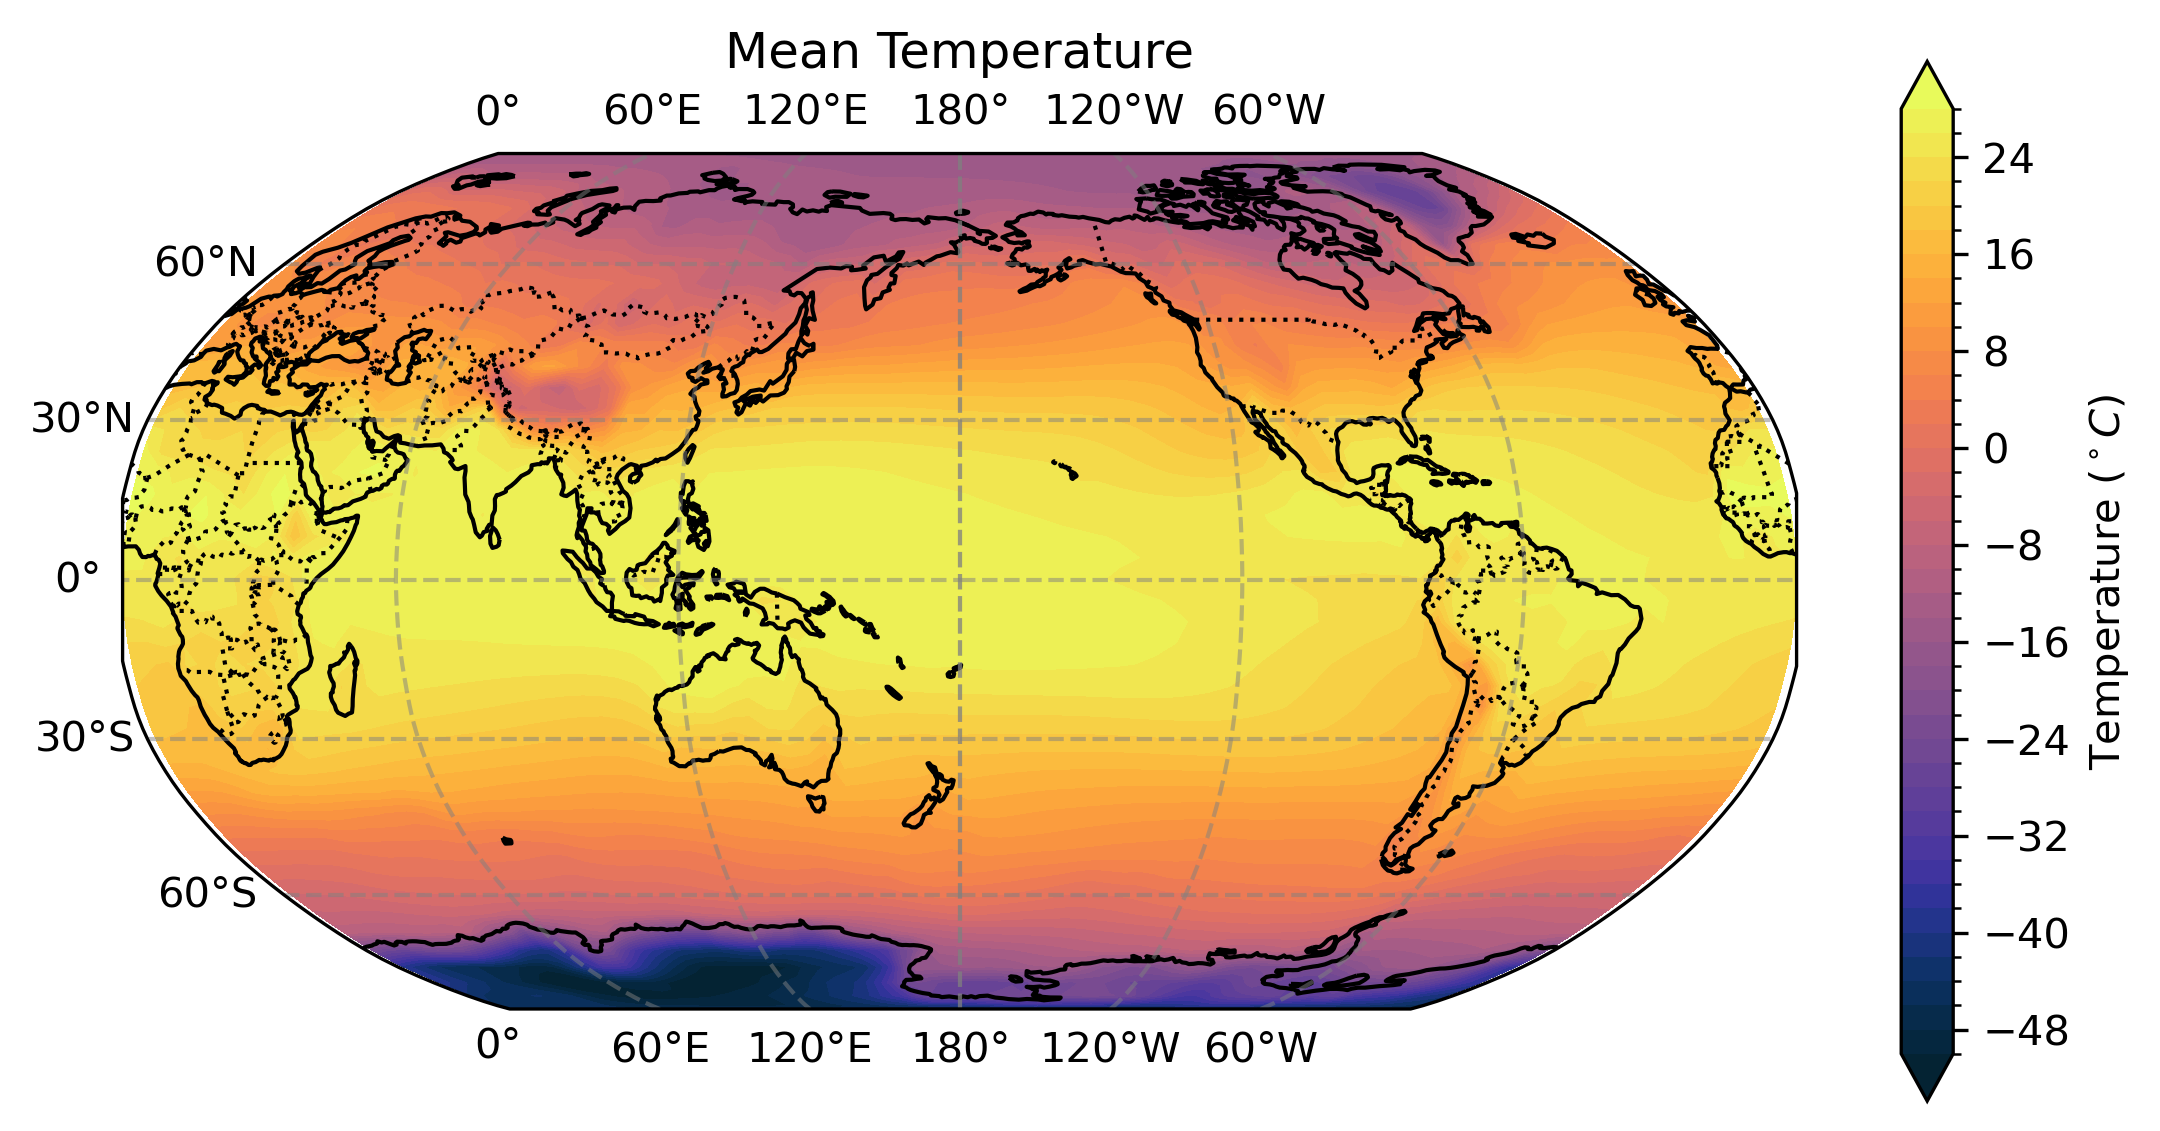

In [10]:
# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
m_t2m.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True, 
    cbar_kwargs = {"label":"Temperature ($^\circ C$)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean Temperature")

# save figure 
fig.savefig('Lab1_ERA5_mean_t2m.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

---
## Part 2: Generate a global map of mean precipitation from 1940-2022 [6pts]

**Using the 2 meter air temperature code as a guide**, generate a global map of mean precipitation for 1940-2022. Broadly, you will take the following steps:
- Import the total precipitation file using xarray (the variable name is `tp`)
- Subset the `tp` DataSet to January 1940 to December 2022
- Calculate the overall mean across the time dimension
- Convert total precipitation from units of m/day to **mm/day** (*Note: the units of the original dataset are in meters. For this parameter, the accumulation period is 1 day. Your final units will be mm/day*)
- Define a suitable colormap (`cmap`) that is appropriate for precipitation data
- Define a suitable colormap range (`lev`) given the range of values in the data
- Generate a filled contour map using `.contourf()`
- Update the colorbar label with the associated units
- Add coastlines and latitude/longitude gridlines
- Add a title
- Save the figure as `Lab1_ERA5_mean_tp.png`

**<span style='color:Red'> [6pts] Insert cell(s) below (`+`) </span> to generate a global map of mean precipitation.** To receive full credit, your map must include all the elements listed above. Add `#` throughout to help keep the code organized. Save the figure as `Lab1_ERA5_mean_tp.png`.

In [11]:
# load data
ds = xr.open_dataset('./Data/ERA5_monthly_tp_regrid.nc')

# subset the data to 1940-2022
ds = ds.isel(time=(ds.time.dt.year < 2023))
ds

<xarray.Dataset>
Dimensions:  (time: 996, lon: 90, lat: 46)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    tp       (time, lat, lon) float32 ...

In [12]:
# calculate mean
ds = ds.mean(dim='time')

# convert m to mm
m = ds['tp'] * 1000

print(m.max())
print(m.min())
m

<xarray.DataArray 'tp' ()>
array(18.9408493)
<xarray.DataArray 'tp' ()>
array(0.00928924)


<xarray.DataArray 'tp' (lat: 46, lon: 90)>
array([[0.6820379 , 0.6888418 , 0.6961547 , ..., 0.6611787 , 0.66897947,
        0.67573875],
       [0.80982953, 0.819627  , 0.8309805 , ..., 0.7945756 , 0.79810596,
        0.8028946 ],
       [1.25352   , 1.4378552 , 1.449025  , ..., 1.0586652 , 1.056398  ,
        1.106492  ],
       ...,
       [0.11118148, 0.09901543, 0.08934171, ..., 0.13997763, 0.13088101,
        0.12216477],
       [0.11339605, 0.11105187, 0.10881104, ..., 0.12456936, 0.1200821 ,
        0.11637388],
       [0.17673466, 0.17673466, 0.17673466, ..., 0.17673466, 0.17673466,
        0.17673466]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0

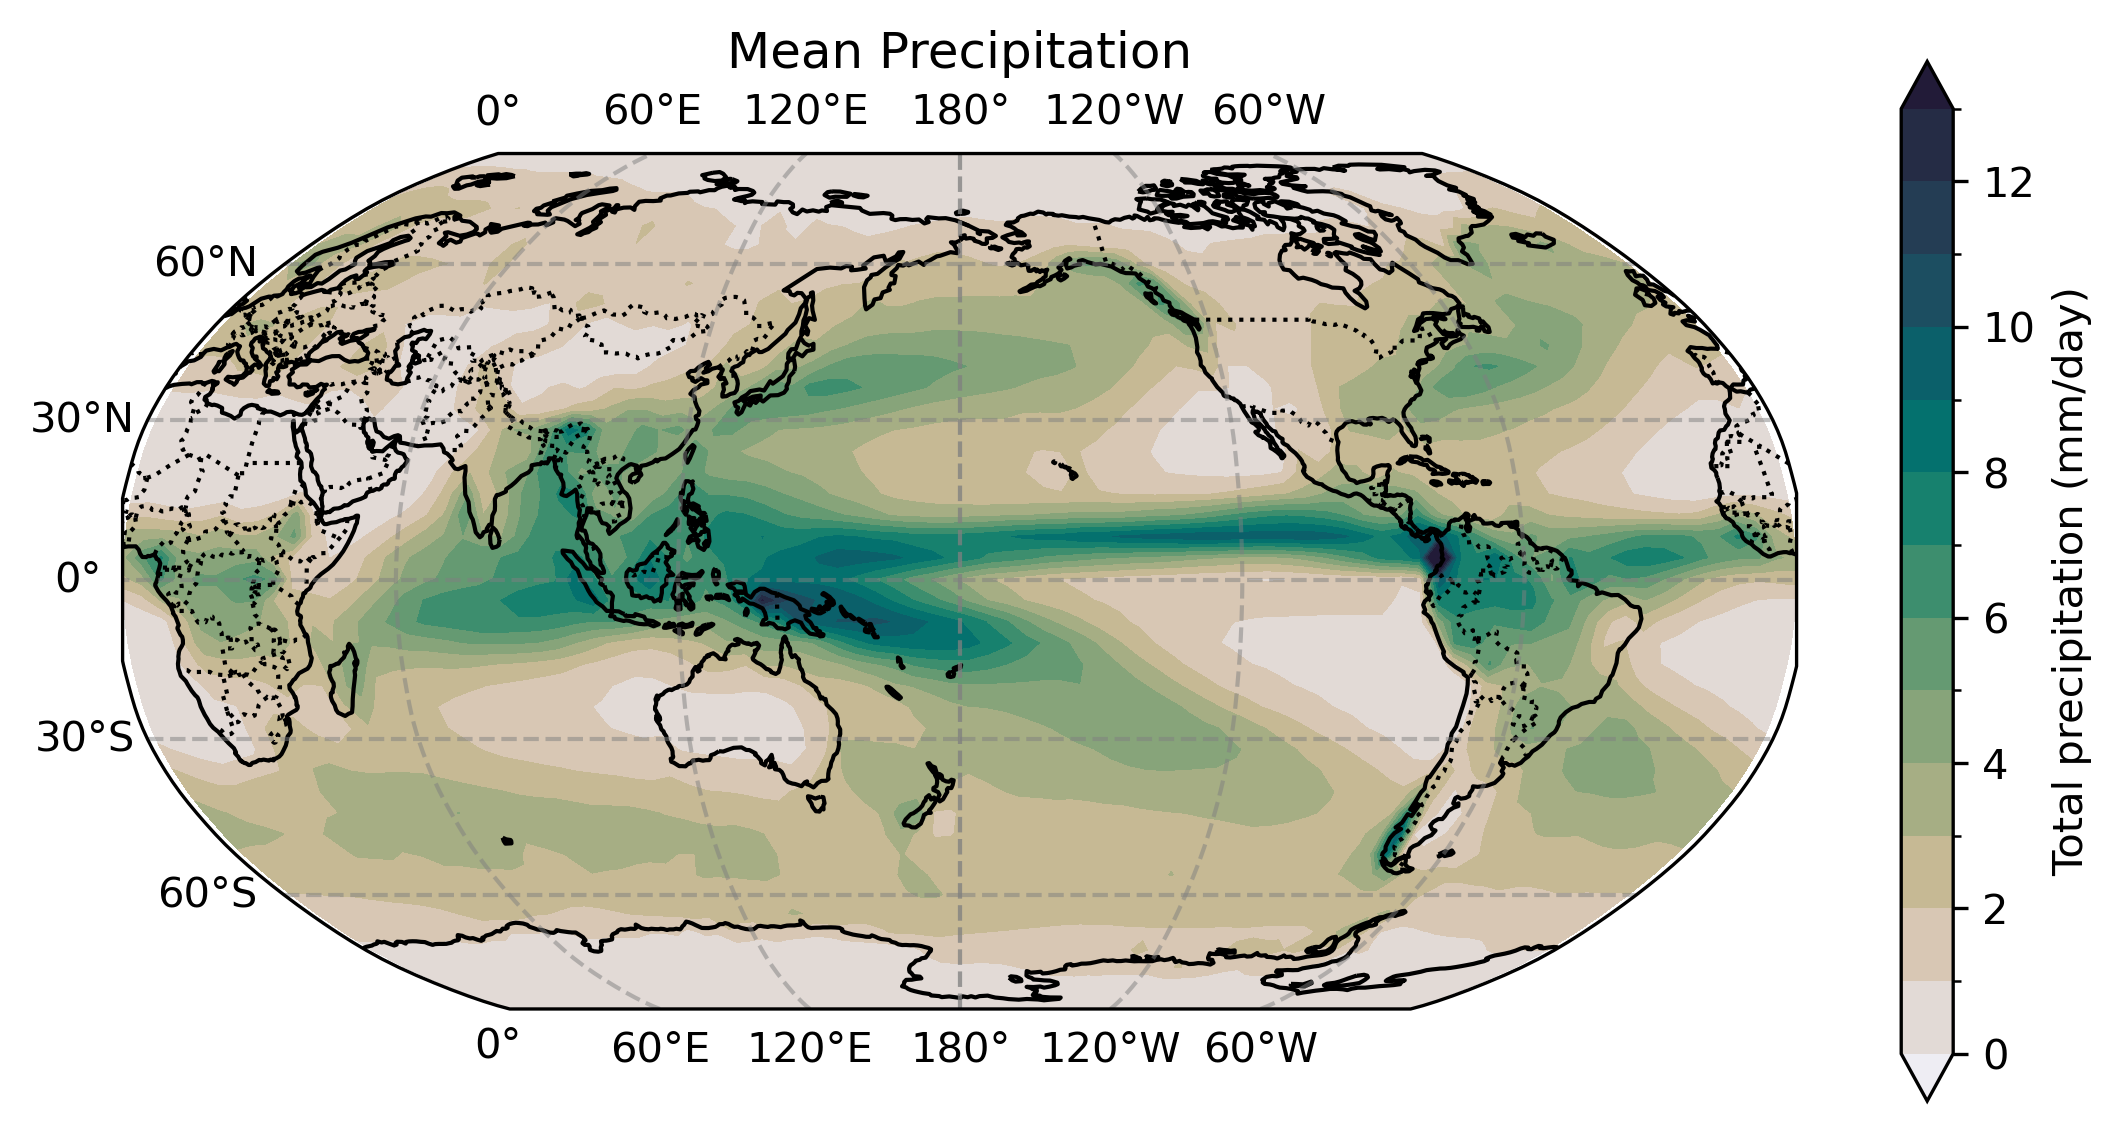

In [13]:
# define colormap and levels (rain is good for precipitation plots)
cmap = cmocean.cm.rain
lev = np.arange(0, 14, 1);

# map projection
proj = ccrs.Robinson(central_longitude=180)

# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
m.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True,
    cbar_kwargs = {"label":"Total precipitation (mm/day)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean Precipitation")

# save figure 
fig.savefig('Lab1_ERA5_mean_tp.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

---
## Part 3: Generate a global map of mean wind speed with vectors showing the direction of the mean winds (for 1940-2022) [10pts]

Global wind patterns are very important for global precipitation and precipitation - evaporation patterns! Now let's generate a global filled contour map of average wind speed (variable `si10`). The process of making the wind speed map will be nearly the same as 2 meter air temperature and total precipitation.

Adding the wind vectors is a little more tricky, so example code is provided below to help guide the process. Use `DataSet.plot.quiver()` to overlay the wind vectors. To do this, you will need to load both the 10 m u-component of the wind (zonal wind), and the 10 m v-component of the wind (meridional wind) and combine them by their coordinates. This will combine the u and v wind component data into one by using their dimension coordinates. **Remember to subset all the wind data (speed, u and v wind components)to 1940-2022 prior to generating the maps.**

The documentation for Xarray's quiver method is linked [here](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.plot.quiver.html). The inputs for `.quiver()` are x (longitude), y (latitude), u (u component), and v (v component). Set the `regrid_shape` argument so that the arrows are not too close together. Example code that you can copy/paste and modify is provided below:

```
# load the u and v wind components
u = xr.open_dataset(...add your file here...)
v = xr.open_dataset(...add your file here...)

# calculate the mean across the time dimension for both u and v wind components
...add your code here...

# combine by coordinates. This combines the given datasets (or data arrays) into one by using dimension coordinates
ds = xr.combine_by_coords([u,v])

# add quivers using ds.plot.quiver(); specify x as longitude, y as latitude, and u and v as the 10 m u and v wind components, respectively. Set regrid_shape=20 to avoid having quivers that are too close together.
ds.plot.quiver(
    x = 'lon',
    y = 'lat',
    u = 'u10',
    v = 'v10',
    ax=ax,
    transform=ccrs.PlateCarree(),
    extend='both',
    regrid_shape=20)

```

**<span style='color:Red'> [10pts] Insert cell(s) below (`+`) </span>** to load the wind data and generate a map of mean annual wind speed. [5pts] for the filled contour map with wind speed and [5pts] for adding the wind vectors. 

Choose a colormap, set the color bar levels, add a title, coastlines, and latitude/longitude gridlines as you did for 2 m air temperature and precipitation. Save your figure as: `Lab1_ERA5_mean_wind.png`

<xarray.Dataset>
Dimensions:  (lon: 90, lat: 46)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
Data variables:
    u10      (lat, lon) float32 -0.4273 -0.5001 -0.5689 ... 1.237 1.237 1.237
    v10      (lat, lon) float32 -0.8083 -0.773 -0.7437 ... 0.01791 0.01791


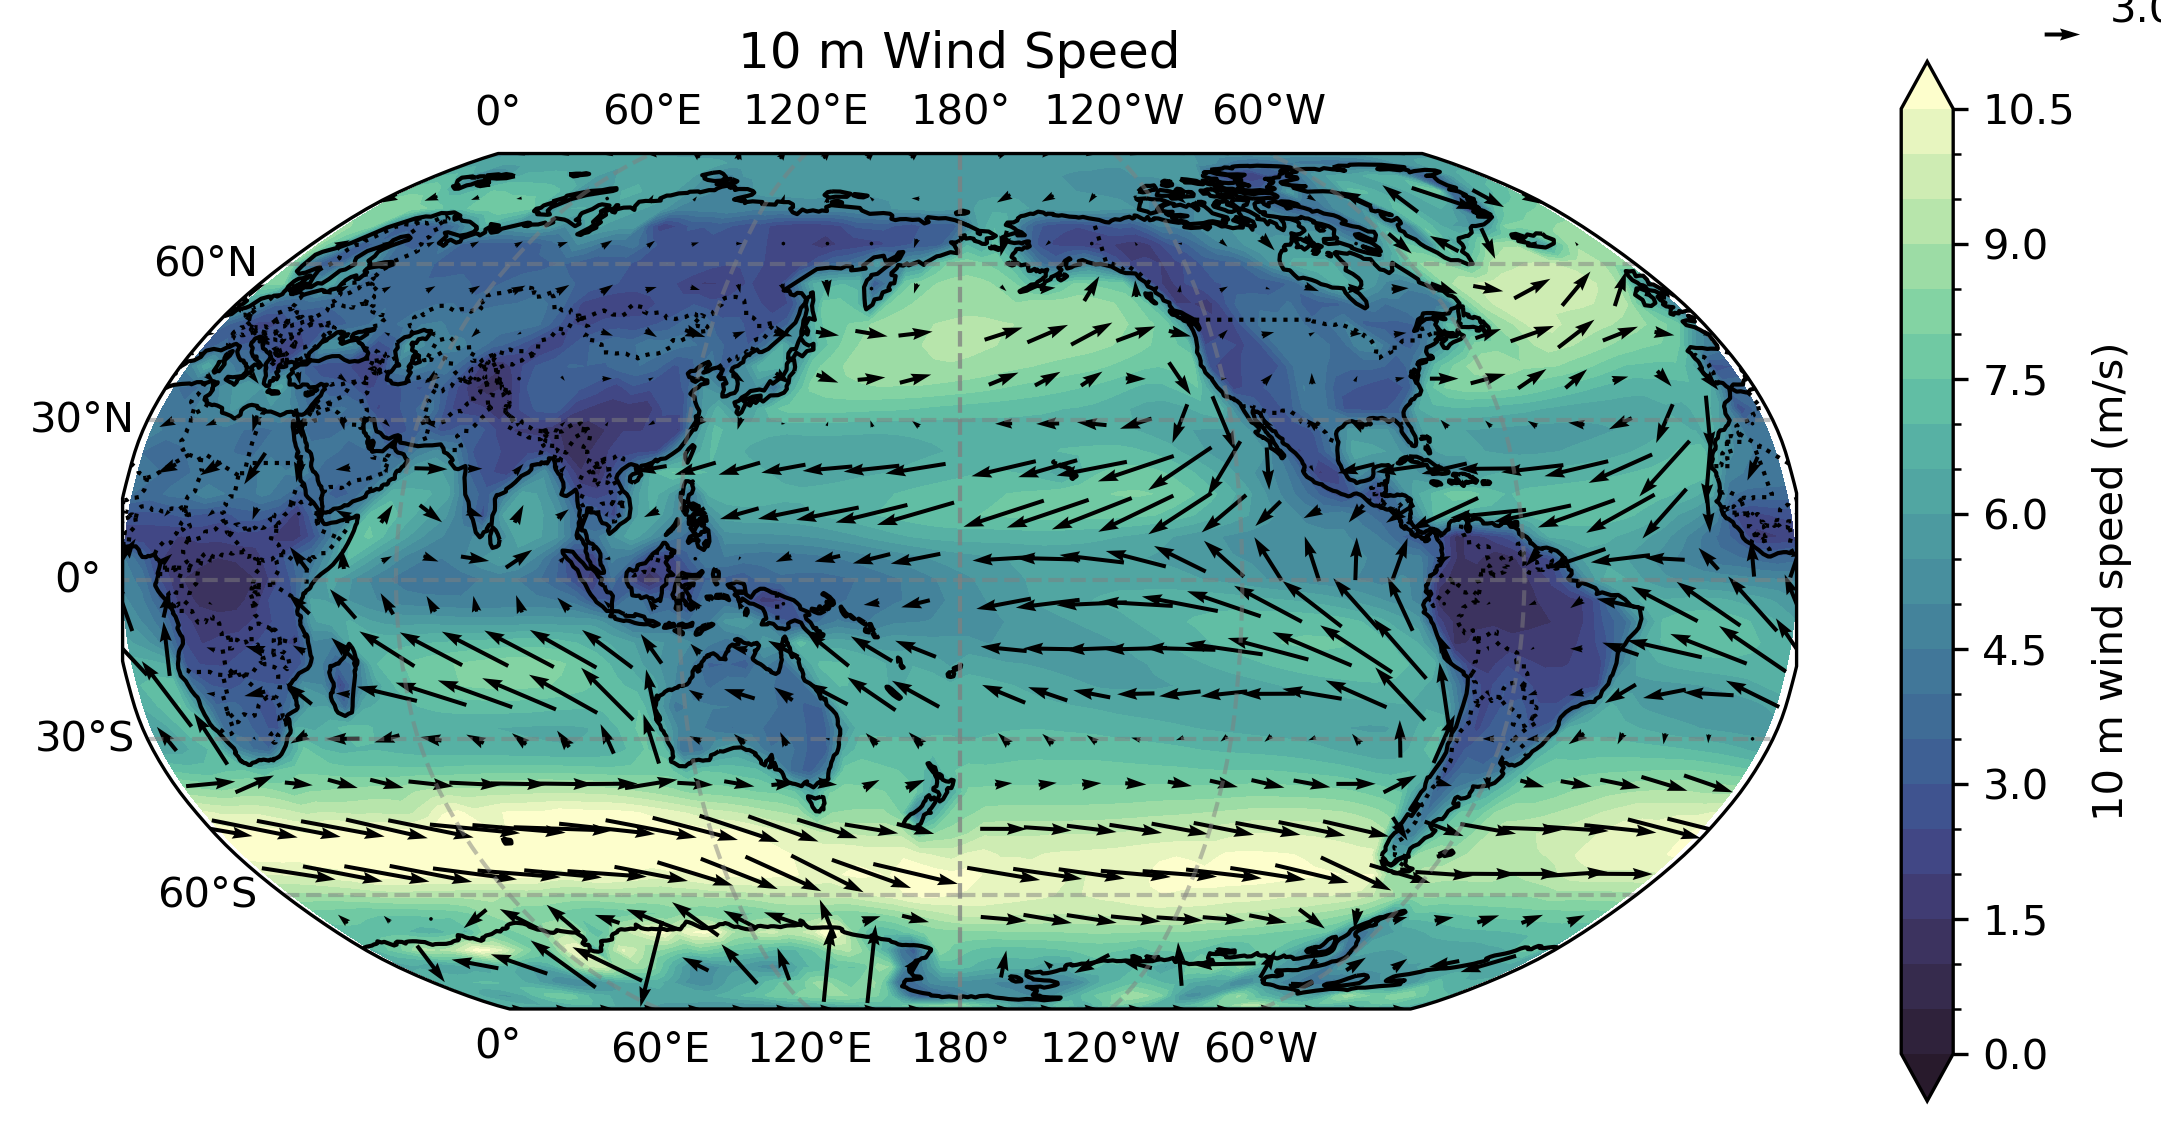

In [14]:
# load u and v wind components and wind speed (si10)
u = xr.open_dataset('./Data/ERA5_monthly_u10_regrid.nc')
v = xr.open_dataset('./Data/ERA5_monthly_v10_regrid.nc')
s = xr.open_dataset('./Data/ERA5_monthly_si10_regrid.nc')

# subset data to 1940-2022
u = u.isel(time=(u.time.dt.year < 2023))
v = v.isel(time=(v.time.dt.year < 2023))
s = s.isel(time=(s.time.dt.year < 2023))

# calculate the mean
u = u.mean(dim='time')
v = v.mean(dim='time')
s = s.mean(dim='time').si10

# combine coordinates for the u and v wnd components. This combines the given datasets (or data arrays) into one by using dimension coordinates.
ds = xr.combine_by_coords([u,v])

print(ds)
cmap = cmocean.cm.deep_r
lev = np.arange(0, 11, 0.5);

# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

s.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True, 
    cbar_kwargs = {"label":"10 m wind speed (m/s)"})

# quiver contour map of mean wind speed
ds.plot.quiver(
    x = 'lon',
    y = 'lat',
    u = 'u10',
    v = 'v10',
    ax=ax,
    transform=ccrs.PlateCarree(),
    extend='both',
    regrid_shape=20)


# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("10 m Wind Speed")

# save figure 
fig.savefig('Lab1_ERA5_mean_wind.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

---
## Part 4: Generate global seasonal mean precipitation maps (for 1940-2022) [8pts]

How does precipitation vary throughout the year? To find this out, let's make maps of seasonal mean precipitation. Seasonal averages are for December-January-February (DJF), March-April-May (MAM), June-July-August (JJA), and September-October-November (SON). ***Remember to subset the data to 1940-2022.***

To calculate a seasonal mean, use the `groupby.()` method you used in Lab 0, but instead here on DataSets and DataArrays instead of Pandas DataFrames. Here you will group the data by season: `ds.groupby(ds['time'].dt.season)` and calculate the mean using the `.mean()` method. For example: `ds_seas = ds.groupby(ds['time'].dt.season).mean()` where `ds_seas` is a variable for the seasonal averages.

`ds_seas[0]` will be the DJF average, `ds_seas[1]` will be the JJA average. You may want to define variables to help keep the seasonal means organized. For example:

```
# define seasonal means by subsetting ds_seas
DJF = ds_seas[0]
JJA = ds_seas[1]
MAM = ...add your code...
SON = ...add your code...
```

*Remember the precipitation will need to be converted from m/day to mm/day.*

**<span style='color:Red'> [8pts, 2pts per plot] Insert cell(s) below (`+`) </span>** to load the precipitation data again and calculate seasonal averages. Generate 4 figures that have the DJF, MAM, JJA, and SON averages. Use consistent formatting for all figures (e.g., colorbars, colorbar levels, titles, etc.) Save your figure as `Lab1_ERA5_mean_tp_seasonal_SEASON.png` where SEASON is DJF, JJA, MAM, SON (e.g., for DJF: `Lab1_ERA5_mean_tp_seasonal_DJF.png`)

In [15]:
# load the total precipitation data
ds = xr.open_dataset('./Data/ERA5_monthly_tp_regrid.nc')

# subset to 1940-2022
ds = ds.isel(time=(ds.time.dt.year < 2023))

# seasonal averages
ds_seas = ds.groupby(ds['time'].dt.season).mean()

# convert from m to mm (the precipitation accumulation is one day so final units are mm/day)
ds_seas = ds_seas['tp'] * 1000

# seasons
DJF = ds_seas[0]
JJA = ds_seas[1]
MAM = ds_seas[2]
SON = ds_seas[3]
SON

<xarray.DataArray 'tp' (lat: 46, lon: 90)>
array([[0.82000506, 0.828798  , 0.8390891 , ..., 0.787191  , 0.79929537,
        0.8106722 ],
       [1.0155131 , 1.0231495 , 1.0293727 , ..., 1.0102425 , 1.0061473 ,
        1.0055138 ],
       [1.5248778 , 1.7451731 , 1.8063174 , ..., 1.3500228 , 1.3397372 ,
        1.3767462 ],
       ...,
       [0.09216128, 0.08140583, 0.07321588, ..., 0.11976887, 0.11075485,
        0.1023595 ],
       [0.11125793, 0.10836194, 0.10564475, ..., 0.12417469, 0.11903164,
        0.11473984],
       [0.18838824, 0.18838824, 0.18838824, ..., 0.18838824, 0.18838824,
        0.18838824]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0
    season   <U3 'SON'

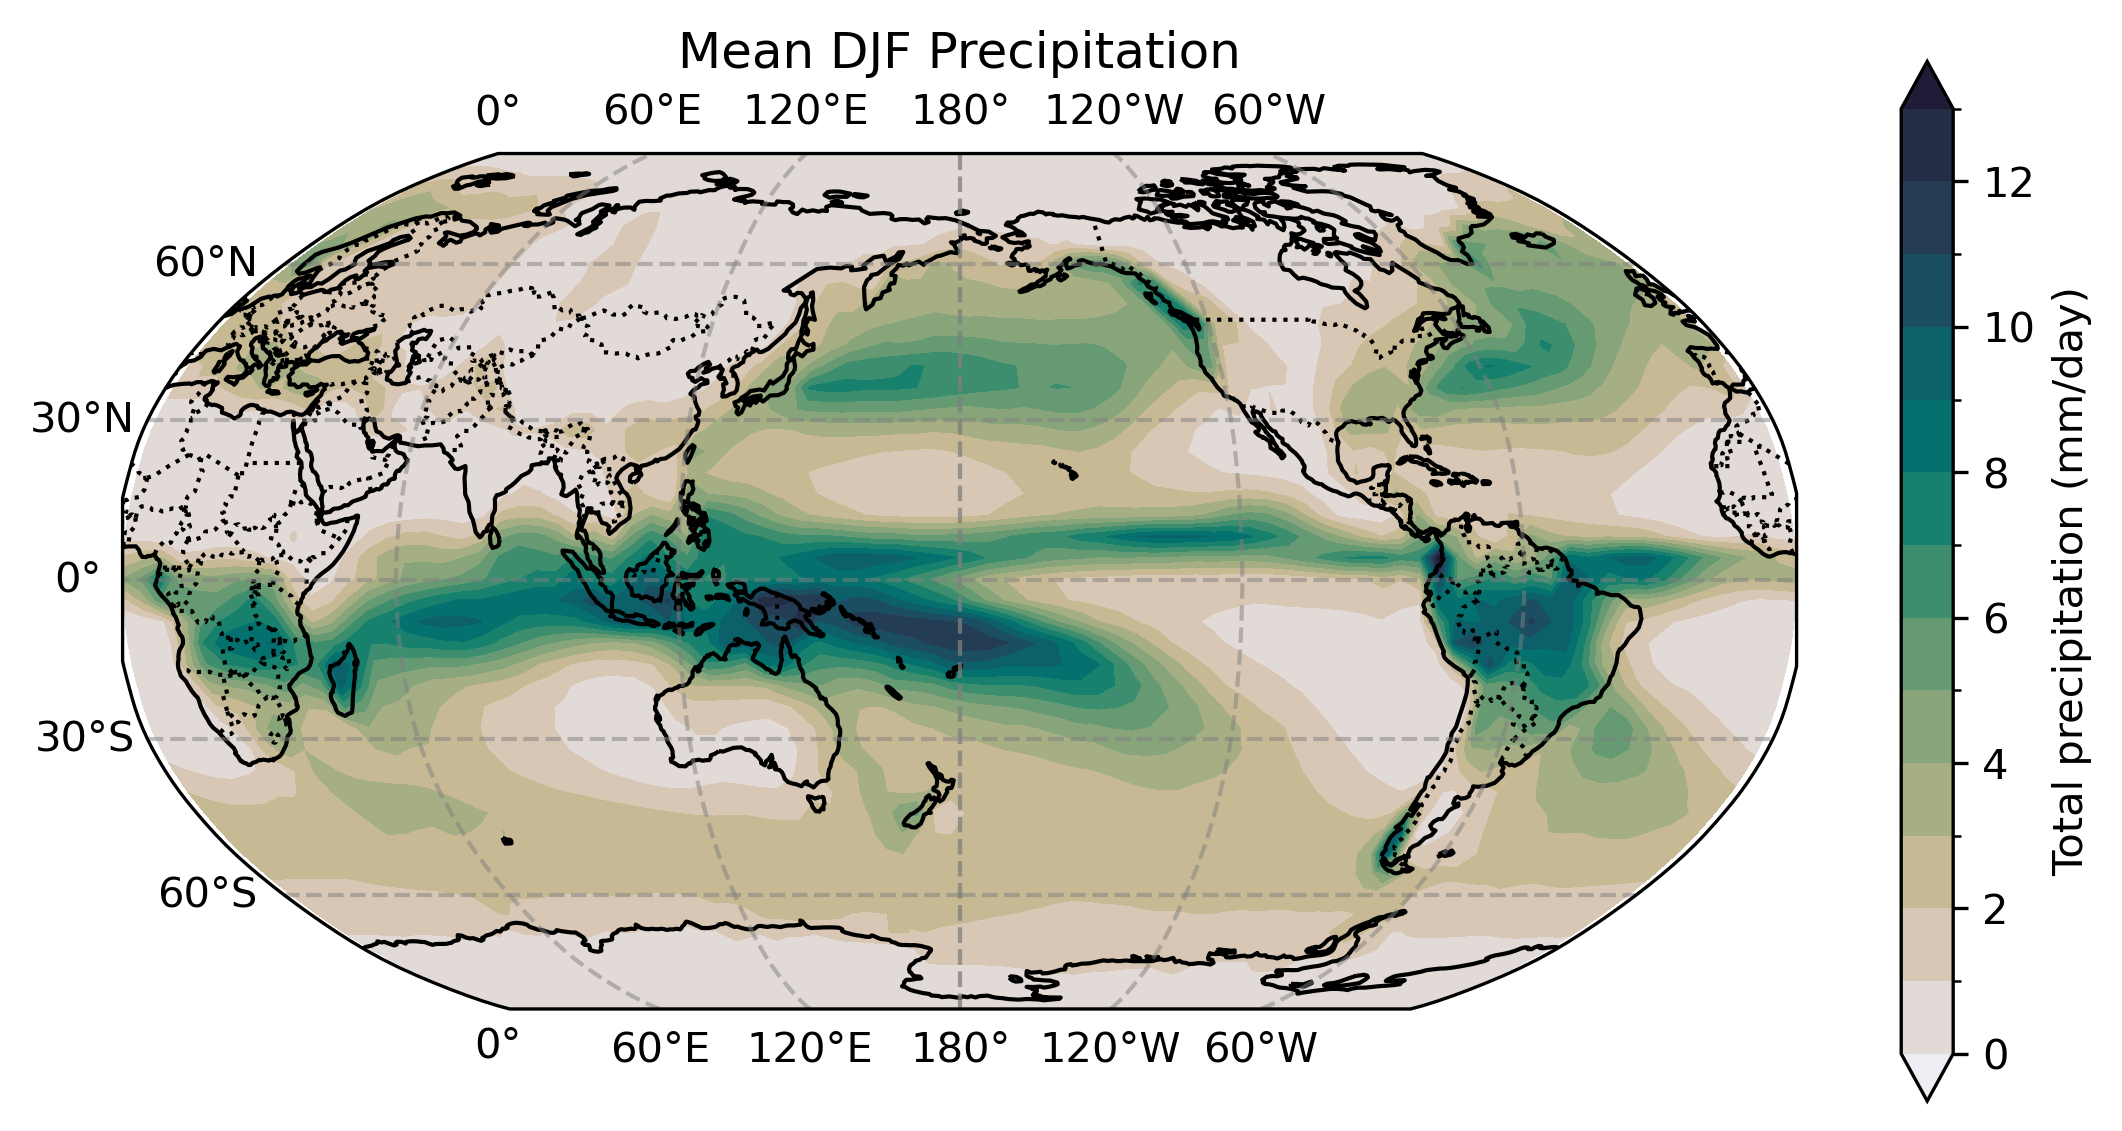

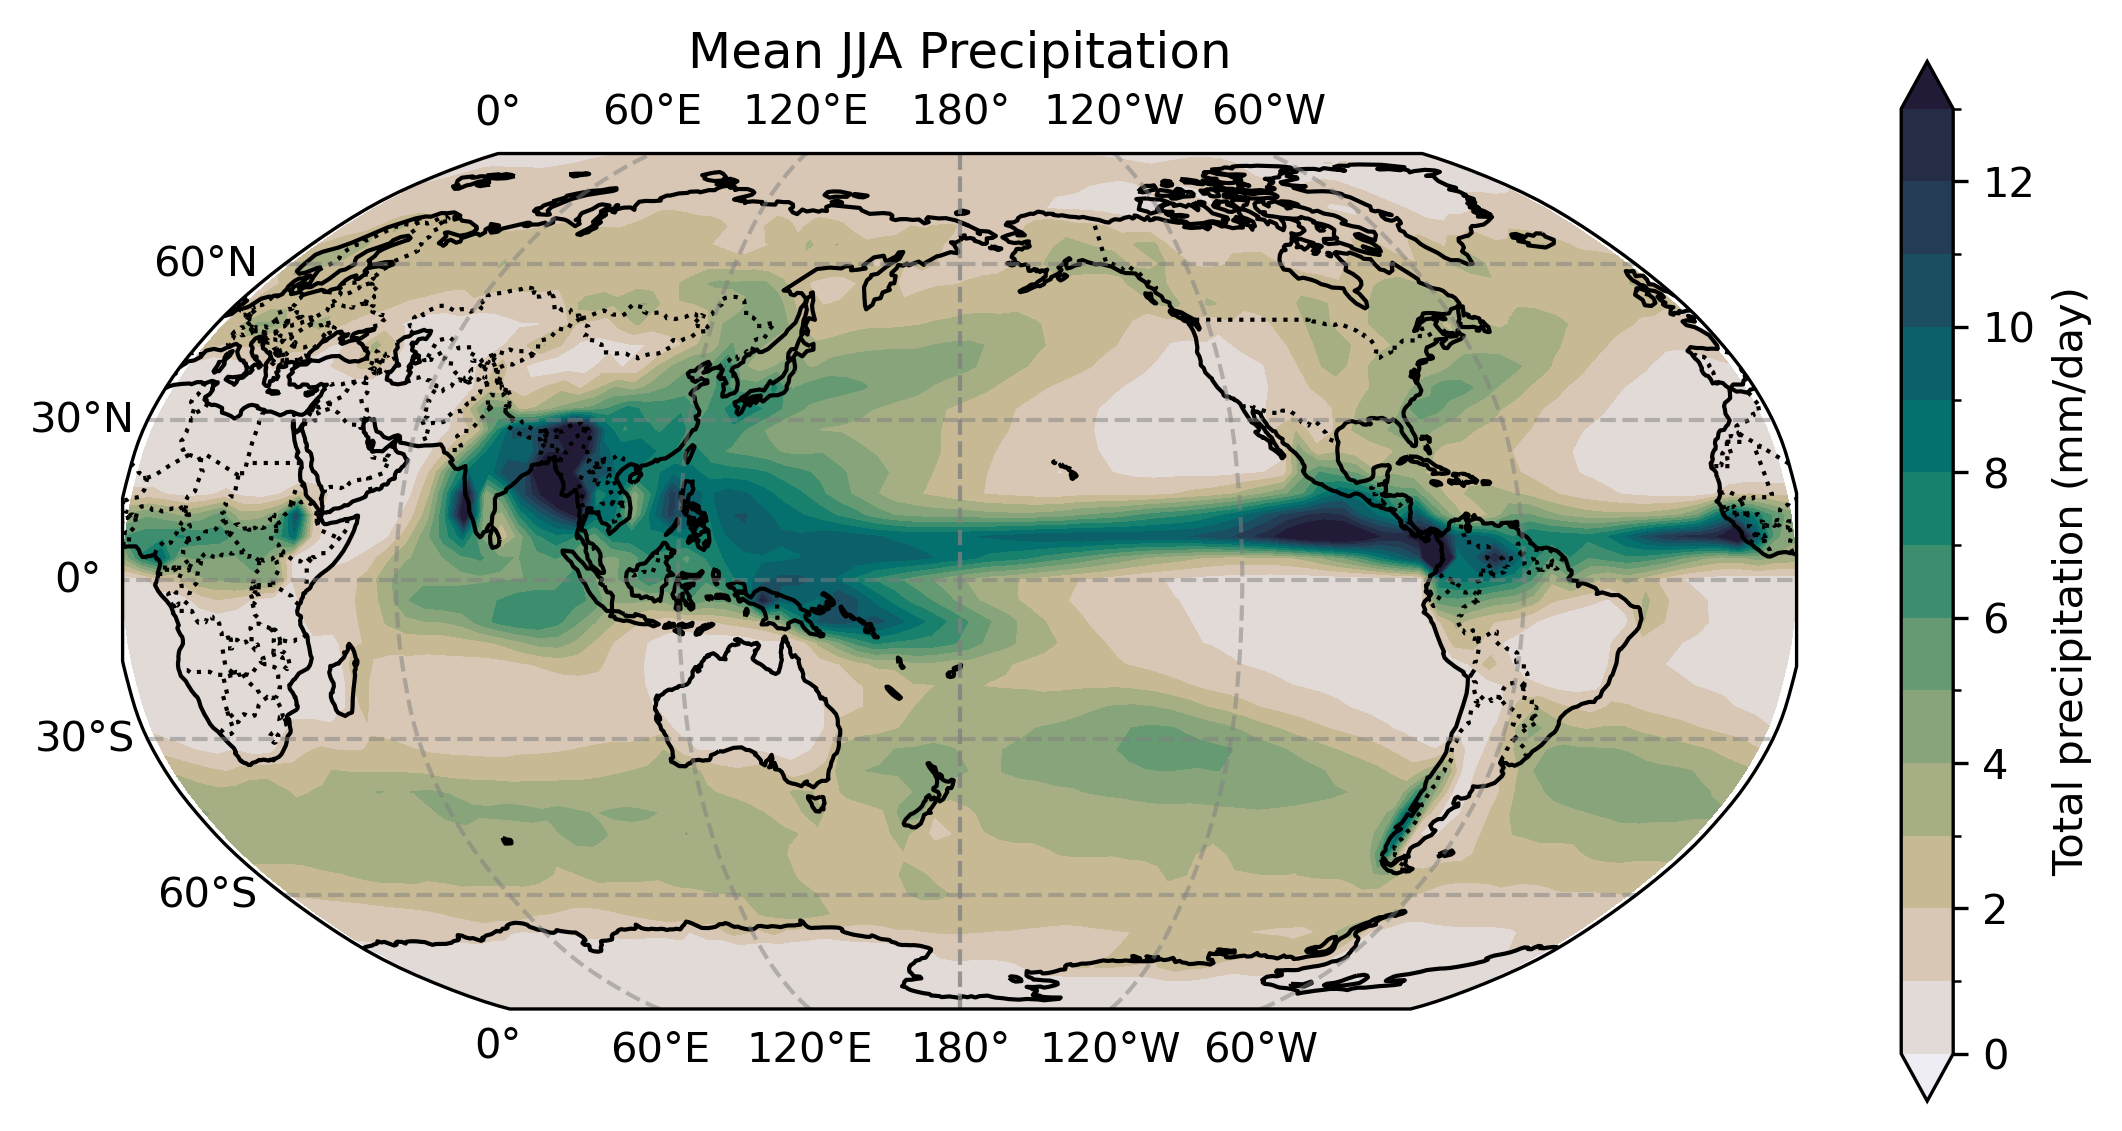

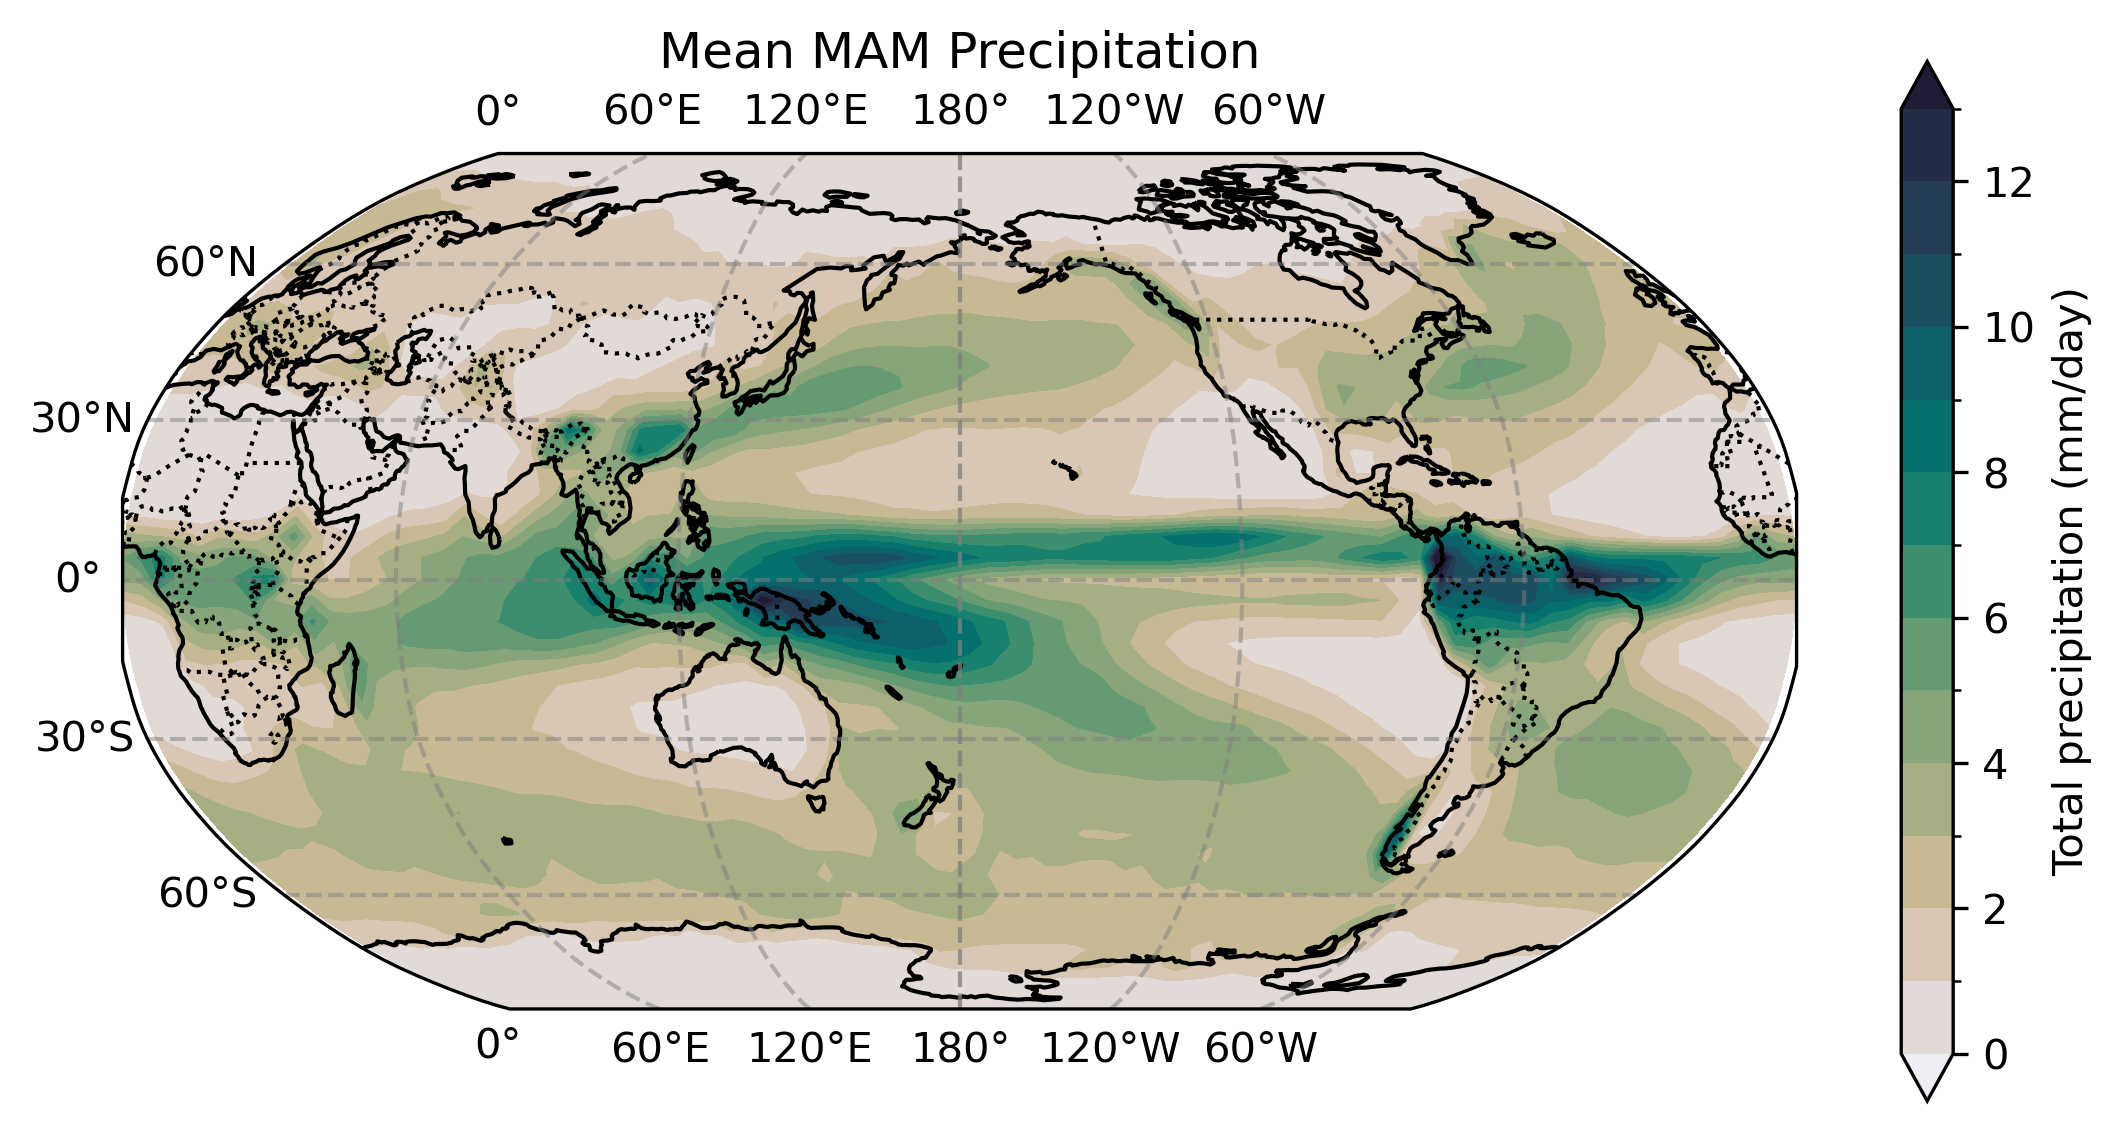

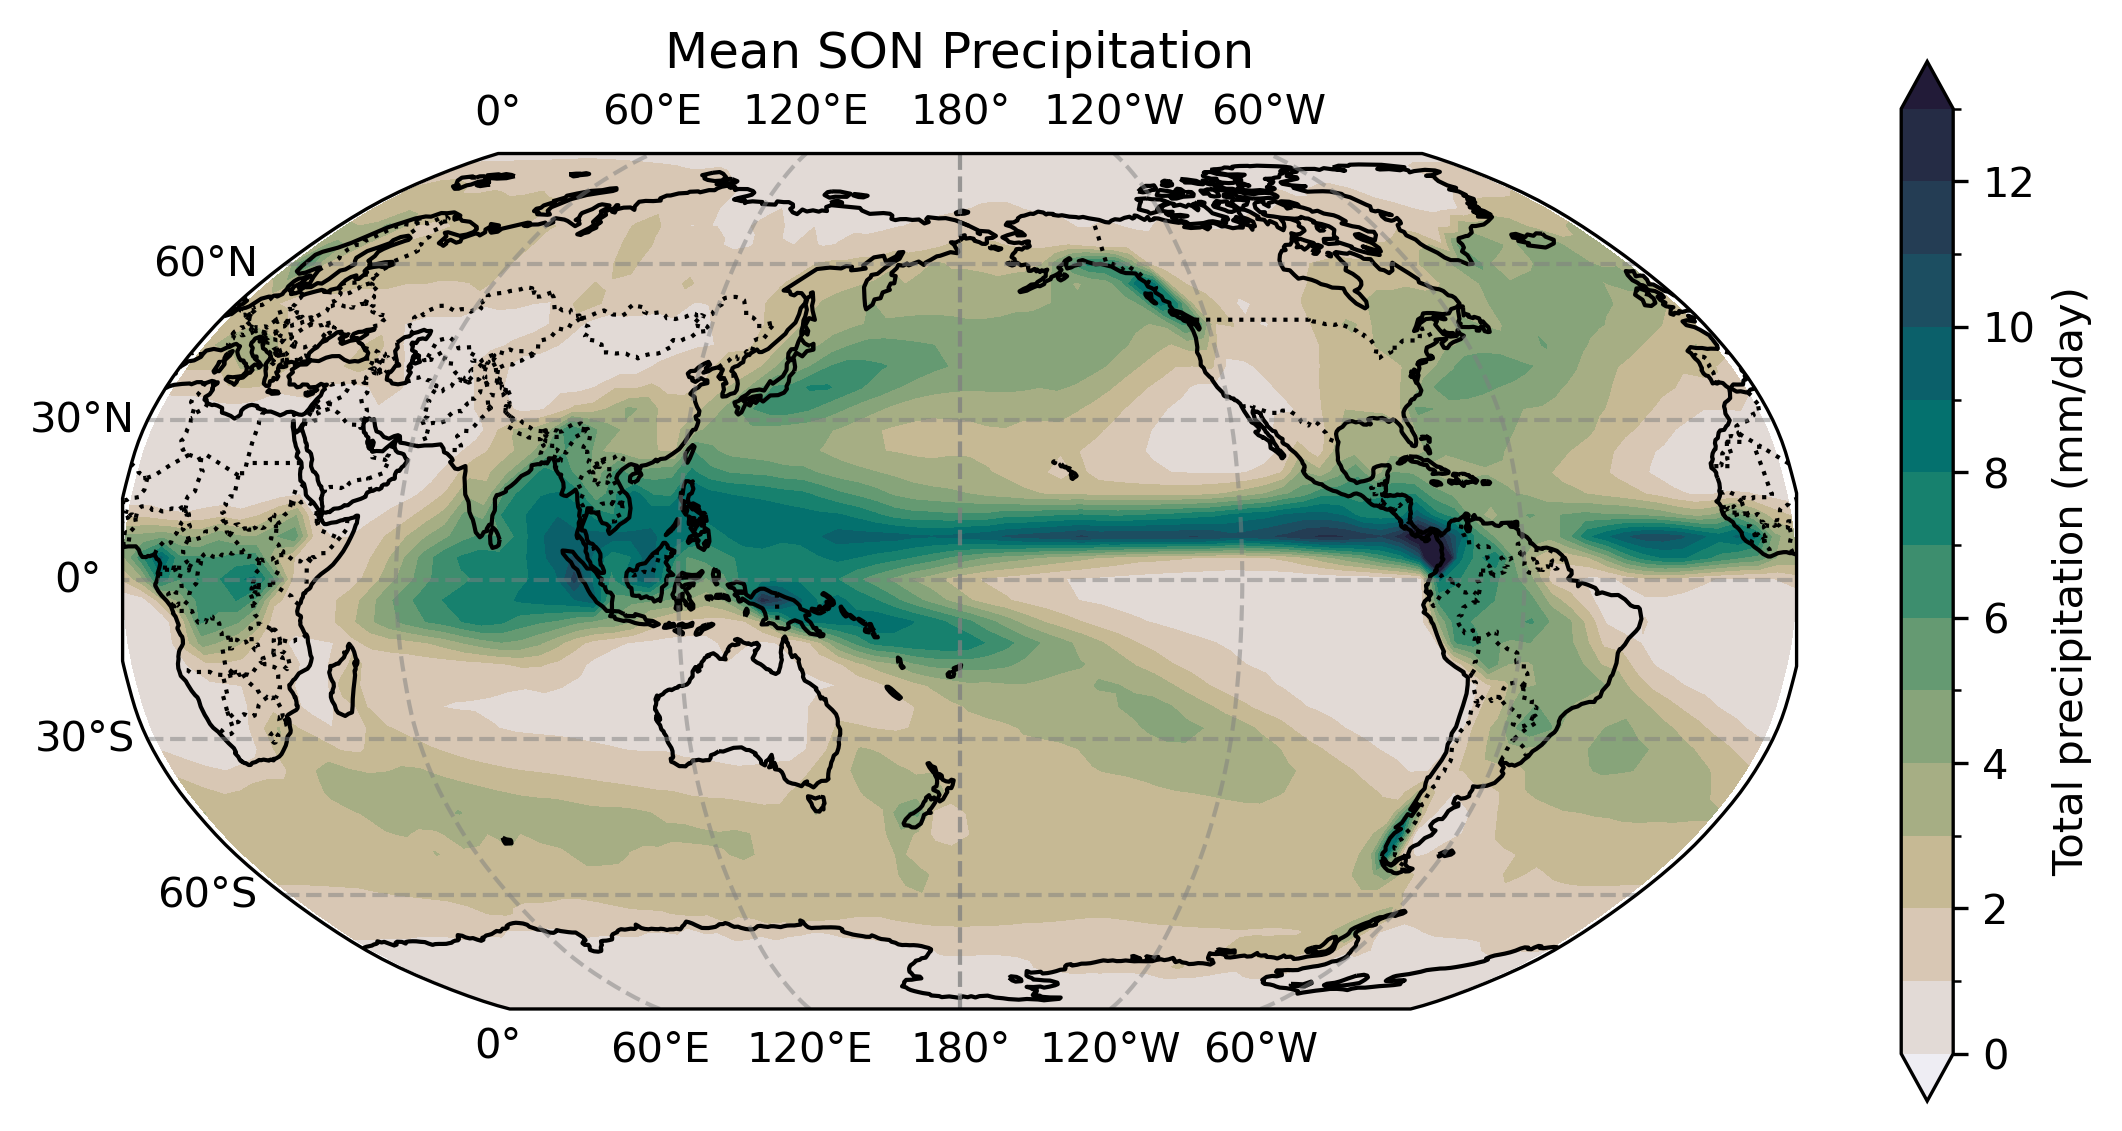

In [16]:
# define colormap and levels for all maps
cmap = cmocean.cm.rain
lev = np.arange(0, 14, 1);

#---DJF-----
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
DJF.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True, 
    cbar_kwargs = {"label":"Total precipitation (mm/day)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean DJF Precipitation")

# save figure 
fig.savefig('Lab1_ERA5_mean_tp_seasonal_DJF.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

#---JJA-----
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
JJA.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True, 
    cbar_kwargs = {"label":"Total precipitation (mm/day)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean JJA Precipitation")

# save figure 
fig.savefig('Lab1_ERA5_mean_tp_seasonal_JJA.png', facecolor = 'white', transparent = False, bbox_inches ='tight')


#---MAM-----
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
MAM.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True,
    cbar_kwargs = {"label":"Total precipitation (mm/day)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean MAM Precipitation")

# save figure 
fig.savefig('Lab1_ERA5_mean_tp_seasonal_MAM.png', facecolor = 'white', transparent = False, bbox_inches ='tight')


#---SON-----
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
SON.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True, 
    cbar_kwargs = {"label":"Total precipitation (mm/day)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Mean SON Precipitation")

# save figure 
fig.savefig('Lab1_ERA5_mean_tp_seasonal_SON.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

---
## Part 5: Generate temperature anomaly maps [8pts]

In the last section of this lab, you will create 2 m air temperature anomaly maps showing the difference (i.e., temperature anomalies) between two 20-year intervals. Here you will plot the difference between (2003-2022) and (1961-1980). To select a temporal subset, use the `time=slice() method`. An example is provided below:

```
# load the 2 m air temperature data (update the line below with the filepath for your computer)
ds = xr.open_dataset('./Data/ERA5_monthly_t2m_regrid.nc')

# subset the data to 2003-01 to 2022-12
ds1 = ds.sel(time=slice('2003-01-01', '2022-12-01')).mean(dim='time')

# extract the t2m dataset for the selected subset
ds1 = ds1['t2m']
```

**<span style='color:Red'> [8pts] Insert cell(s) below (`+`) </span>** to:
1. Load the 2 meter temperature NetCDF file by updating the filepath for your computer
2. Subset the data to (2003-2022) and the (1961-1980)reference interval
3. Calculate the mean for each interval
4. Calculate the anomalies (the difference). For example `anom = ds2 - ds1` where `ds1` and `ds2` are the DataArrays for the different time intervals. Calculate the (2003-2022) - (1961-1980) anomalies.
5. Generate a difference map. The [cmocean Balance](https://matplotlib.org/cmocean/) colormap is recommended. Blue colors will indicate cool anomalies and red colors will indicate warm anomalies. 
6. Add titles, coast lines, grid lines, etc. as you did with the other global maps.
7. Save the figure as `Lab1_ERA5_anom_t2m.png`

In [17]:
# load 2 m air temperature dataset
ds = xr.open_dataset('./Data/ERA5_monthly_t2m_regrid.nc')

# subset to 1940-2022
ds = ds.isel(time=(ds.time.dt.year < 2023))

# define the 2003-2022 subset and convert from K to degree C
ds1 = ds.sel(time=slice('2003-01-01', '2022-12-01')).mean(dim='time') - 273.15

# define the 1961-1980 subset and convert from K to degree C
ds2 = ds.sel(time=slice('1961-01-01', '1980-12-01')).mean(dim='time') - 273.15

# calculate the anomaly (difference)
anom = ds1 - ds2

# define 2 m air temperate data array (single variable)
anom = anom['t2m']
anom

<xarray.DataArray 't2m' (lat: 46, lon: 90)>
array([[2.6080322 , 2.6422424 , 2.6688232 , ..., 2.558258  , 2.5620117 ,
        2.5807495 ],
       [2.5106506 , 2.6047974 , 2.6748962 , ..., 2.302887  , 2.2948914 ,
        2.3892822 ],
       [4.06073   , 4.375641  , 4.3740234 , ..., 2.710266  , 2.6018066 ,
        3.2355652 ],
       ...,
       [0.98794556, 1.0453339 , 1.1151276 , ..., 0.93403625, 0.9431915 ,
        0.95755005],
       [0.71165466, 0.7188568 , 0.7293854 , ..., 0.668396  , 0.6850891 ,
        0.70040894],
       [0.4993286 , 0.4993286 , 0.4993286 , ..., 0.4993286 , 0.4993286 ,
        0.4993286 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.875 5.875 9.875 13.88 ... 345.9 349.9 353.9 357.9
  * lat      (lat) float64 88.12 84.12 80.12 76.12 ... -83.88 -87.88 -90.0

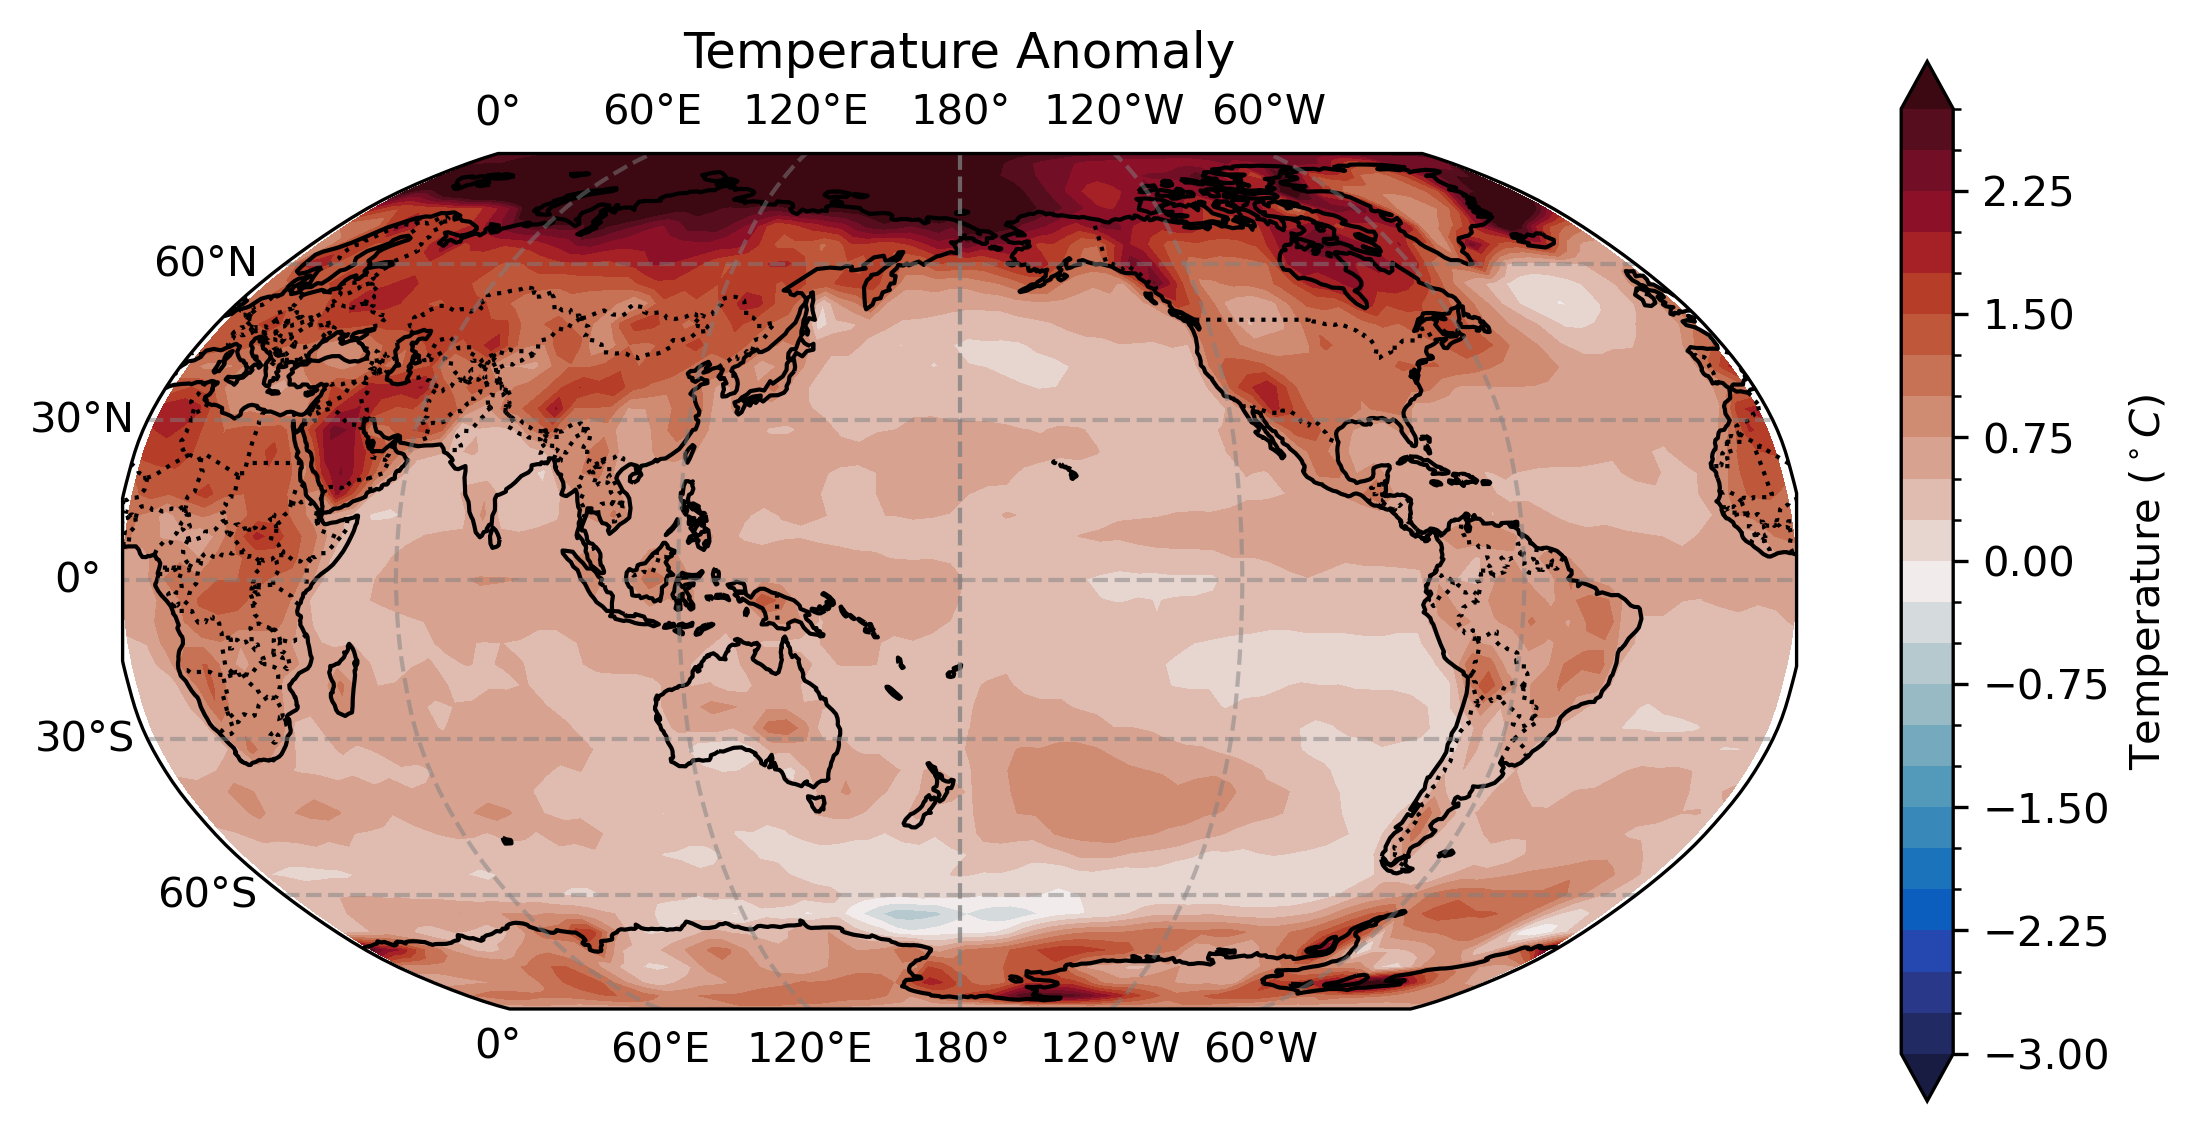

In [18]:
# define the cmocean colormap (balance) and the levels (lev)
cmap = cmocean.cm.balance
lev = np.arange(-3, 3, 0.25);

# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of mean temperature
anom.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    colors=cmap,
    add_colorbar=True,
    cbar_kwargs = {"label":"Temperature ($^\circ C$)"})

# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')

# add title
ax.set_title("Temperature Anomaly")

# save figure 
fig.savefig('Lab1_ERA5_anom_t2m.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

---
## Part 6: Global atmospheric circulation synthesis questions [18 pts]

**When answering the following questions, please consult your Lab 1 figures and draw upon your knowledge of the week 1 and 2 course material.** To receive full credit you must explain your reasoning.

1. [1pt] Where are the highest and lowest surface temperatures found? How do these patterns relate to Earth's enegy budget?

2. [1pt] Please select a region on the temperature map that looks interesting to you. Describe why you find this region interesting and explain what contributes to the average temperature in that region.

3. [1pt] The amount of incoming solar radiation at the top of the atmosphere is zonally symmetric *before* any shortwave radiation is reflected or absorbed in the atmosphere or at the surface. Why are the temperature patterns not zonally symmetric at a given latitude? For example over land and along the equator in the Pacific Ocean.

4. [1pt] What is a pressure gradient force and how does this influence the wind speed and direction?

5. [1pt] How does the equator-to-pole latitudinal energy imbalance set the atmosphere into motion? 

6. [1pt] What are the two major factors that influence the magnitude of the wind deflection by the Coriolis effect? How does the Coriolis effect impact the speed of the wind?

7. [1pt] What latitude range are the surface winds the fastest? Based on the three-cell model of atmospheric circulation, what cell are the fastest winds in? For this question you can ignore small patches of high wind speeds and focus on the broader global patterns. 

8. [2pts] Let’s focus on the tropics (30°S – 30°N). On average, what direction do the winds blow from in the Northern Hemisphere between 0-30°N? What direction do the winds blow from in the Southern Hemisphere between 0-30°S? What do we call these winds? What *processes* explain these surface wind patterns? To receive full credit for the question, you must discuss the fundamental accelerations that drive global wind patterns.

9. [1pt] What happens to the winds near the equator? Are they converging or diverging? What about the winds in the subtropics around 30°N and 30°S?

10. [2pts] How does surface level convergence and divergence influence vertical winds (not plotted in this lab, but discussed in class)? How do the vertical winds associated with uplift and subsidence impact atmospheric pressure at both the surface and in the upper troposphere? How does uplift and subsidence influence total cloud cover and why?

11. [1pt] What part of the world has the highest precipitation? In this lab, please focus on broad bands of precipitation. Do you see a connection between the surface winds and the amount of precipitation? Does this band of precipitation have a special name?

12. [2pts] Broadly, how do large-scale wind patterns influence global rainfall patterns? 

13. [2pts] How do the tropical rainbelts over the ocean change seasonally throughout the year? How does precipitation vary seasonally in areas with a monsoonal climate (e.g., India, East Asia, West Africa, Australia). How does highly seasonal precipitation impact the people that live in these areas? 

14. [1pt] Explain the pattern of warming observed during the past 20-years (2003-2022) compared to the 1961-1980 reference interval. Which areas are warming the most? Why?


**<span style='color:Red'> Insert a cell below (`+`) </span>** to answer the synthesis questions. Select Markdown instead of Code from the drop-down menu and type your responses.

## Congratulations! You completed your second EV333 lab! 

**To submit your lab:**
1. Run the entire Notebook from the beginning and check that it generates all figures and does not have any errors.
2. Save your Jupyter Notebook and upload it to Canvas with the following file name: *LastName_FirstName_EV333_Lab1.ipynb*